#Purwa Vijay Mugdiya
(Student ID - 989468918)

**Name of the Project :**
#**Personality Traits**

**Subtitle :**
###**Statistical Measures of Personality Test**

---

#**1.<u>Objective of the proposed Research</u>**

The purpose of this study is to use linear regressions to extract the dimensions of personality from the provided data. Understanding the psychological data collected from college students through a survey and analyzing it using quantitive, categorical, and regression approaches are all part of the study.

The analysis began with loading, cleaning, and exploring the data based on the questionnaire, trying to identify various personality traits of an individual and how different traits are related to one another, and responding to questions like why and how the entities are related, if they are related, and why not? The data was anonymous and hazy. if statistics and a linear regression model indicate they are unrelated.

In order for our stakeholders, including **The San Francisco County Office of Education**, to better serve college counselors, the report provides a brief overview of the analysis that was done on the Personality Test data and identifies the best Simple and Multiple Regressions model to identify the specific Personality of an individual.
PT.avif

Below packages are required to perform data wrangling and data manipulation in the given dataset.

In [ ]:
#Installing Libraries
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
install.packages("scatterplot3d")
library(scatterplot3d)
install.packages("psych")
library(psych)


Read, import and merge three dataset then combine and store the data in one dataframe variable.

In [27]:
#loading the dataset using read_excel and merging three dataset using rbind
Sheet1_df <- read_excel("/content/Sheet1.xlsx")
nrow(Sheet1_df)
Sheet2_df <- read_excel("/content/Sheet2.xlsx")
nrow(Sheet2_df)
Sheet3_df <- read_excel("/content/Sheet3.xlsx")
nrow(Sheet3_df)
Personality_Test_df <- rbind(Sheet1_df,Sheet2_df,Sheet3_df)
nrow(Personality_Test_df)
head(Personality_Test_df,2)

[1] 33

[1] 30

[1] 39

[1] 102

Extrovert,Imaginitive,Spontaneous,Balanced,Calm,Tough_Minded,Reserved,Controlled,Relaxed,Dependant,⋯,Socialite,Unconstrained,Temperamental,Philosophical,Expressive,Self_Assured,Logical,Empathy,Reactive,Confident
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,9,10,6.5,8.5,5,0,10,8,5.5,⋯,7,8,10,6,8.5,10,8,10,10,8.5
4,5.5,5,8,1,8,6,8,8,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


#<u>**2. Data Exploration:</u>**

This section shares the details of the dataset in the form of name of the columns, count of rows and columns, summary, sorting, cleaning and displaying the 4 different aspect of data as :

1.   Fetching number of rows and columns in the dataset.
2.   Details of the columns and the summary of the data.
3.   Checking for missing values in the dataFrame.
4.   Performed calulations by finding Median of the three entities.
5.   Perfomed cleansing by removing the unwanted data and the missing data.


In [100]:
# Convert the entire DataFrame to numeric
Personality_Test_df <- as.data.frame(sapply(Personality_Test_df, as.numeric))
class(Personality_Test_df$indifference)
summary(Personality_Test_df)

[1] "numeric"

[1] "numeric"

   Extrovert       Imaginitive      Spontaneous        Balanced    
 Min.   :-2.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 5.575   1st Qu.: 5.000   1st Qu.: 4.950   1st Qu.: 5.00  
 Median : 7.000   Median : 7.000   Median : 7.000   Median : 7.00  
 Mean   : 6.825   Mean   : 6.265   Mean   : 6.253   Mean   : 6.68  
 3rd Qu.: 8.775   3rd Qu.: 8.000   3rd Qu.: 8.125   3rd Qu.: 8.55  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
                  NA's   :2        NA's   :2        NA's   :2      
      Calm         Tough_Minded       Reserved        Controlled    
 Min.   : 1.000   Min.   : 1.000   Min.   : 0.000   Min.   : 1.000  
 1st Qu.: 5.000   1st Qu.: 4.750   1st Qu.: 3.500   1st Qu.: 6.000  
 Median : 7.000   Median : 6.500   Median : 6.000   Median : 8.000  
 Mean   : 6.589   Mean   : 6.465   Mean   : 5.723   Mean   : 7.393  
 3rd Qu.: 8.275   3rd Qu.: 8.000   3rd Qu.: 8.000   3rd Qu.: 8.850  
 Max.   :10.000   Max.   :10.000   Max.   

In [94]:
#Fetch all the column names in the Dataset using names()
names(Personality_Test_df)

[1] "Extrovert"           "Imaginitive"         "Spontaneous"        
 [4] "Balanced"            "Calm"                "Tough_Minded"       
 [7] "Reserved"            "Controlled"          "Relaxed"            
[10] "Dependant"           "Conforming"          "Affectionate"       
[13] "Disciplined"         "Worried"             "Shy"                
[16] "Practical"           "Familiarity_Recheck" "Quiet"              
[19] "Bold"                "Delusional"          "Non_Conforming"     
[22] "Focused"             "Self_doubt"          "Introvert"          
[25] "Concrete"            "Mentally_Stable"     "Outgoing"           
[28] "Visionary"           "Emotional"           "Tactile"            
[31] "Unappeaseable"       "Impulsive"           "Self _Reliant"      
[34] "Analysing"           "Determined"          "Carefree"           
[37] "Observer"            "Realistic"           "indifference"       
[40] "Passionate"          "Wonderer"            "Socialite"          
[43] "Unconstrained"       "Temperamental"       "Philosophical"      
[46] "Expressive"          "Self_Assured"        "Logical"            
[49] "Empathy"             "Reactive"            "Confident"

In [ ]:
#Fetch number of rows an dcolumns in the dataset using dim()
dim(Personality_Test_df)

In [ ]:
#Handling Missing values
Personality_Test_df <- distinct(Personality_Test_df)
anyNA(Personality_Test_df)

[1] TRUE

In [ ]:
#Drop missing Values using drop_na()
Personality_Test_df <- drop_na(Personality_Test_df)
dim(Personality_Test_df)

In [54]:
#Removing missing values using complete.cases()
clean_Personality_df <- Personality_Test_df[complete.cases(Personality_Test_df), ]
clean_Personality_df <- as.data.frame(sapply(Personality_Test_df, as.numeric))
dim(clean_Personality_df)

[1] 102  51

In [93]:
#Calculating the median
Extrovert_median <- median(clean_Personality_df$Extrovert)
Extrovert_median
Calm_median <- median(!is.na(clean_Personality_df$Calm))
Calm_median
shy_median <- median(!is.na(clean_Personality_df$Shy))
shy_median

[1] 7

[1] 1

[1] 1

#**<u>3. Simple Linear Regression:</u>**

1. **Model 1 : Imaginative vs Visionary**
* In this model I am predicting an individual's imagination(predicted variable) with Visionary(independent variable) traits.
* This analysis leads us to the conclusion that there is no statistically significant linear association between a person's "Imaginative" feature and their "Visionary" traits because the P-value(4.78e) is high and R-squared value(0.02027) is low.

2. **Model 2 : Introvert vs Observer**
* The link between the dependent variable Introvert and the independent variable Observer is specified in the second linear regression model. It denotes that we wish to predict Introver Personality of an individual using the Observer's data.
* This model suggests that individuals who exhibit more "Observer" characteristics tend to have higher levels of introversion.

3. **Model 3 : Logical vs Practical**
* Based on the "Practical" traits independent variable, the model attempts to predict the "Logical" traits, the response variable.
* Based on this model, there is no significant linear relationship between an individual's "Practical" attributes and their "Logical" trait in the dataset. The p-value for the "Practical" coefficient is high, indicating that "Practical" does not provide a meaningful prediction of "Logical" in this context.
* This model does not provide strong evidence to support such a relationship.

4. **Model 4 : Confidence vs Tactile**
* This model's purpose is to predict "Confidence" dependent variable from "Tactile" the predictor variable. It means I am modeling "Confidence" as the dependent variable and trying to figure out how "Tactile" effects or explains differences in "Confidence."

5. **Model 5 : Impulsive vs Reactive**
* This model's goal is to predict "Impulsive" dependent variable from "Reactive" the predictor variable.It means I am modeling "Impulsive" as the dependent variable and trying to figure out how "Reactions" effects or explains changes in "Impulsiveness".
* This finding suggests that individuals who exhibit more reactive characteristics tend to have higher levels of impulsiveness.

[1] 0.3224725

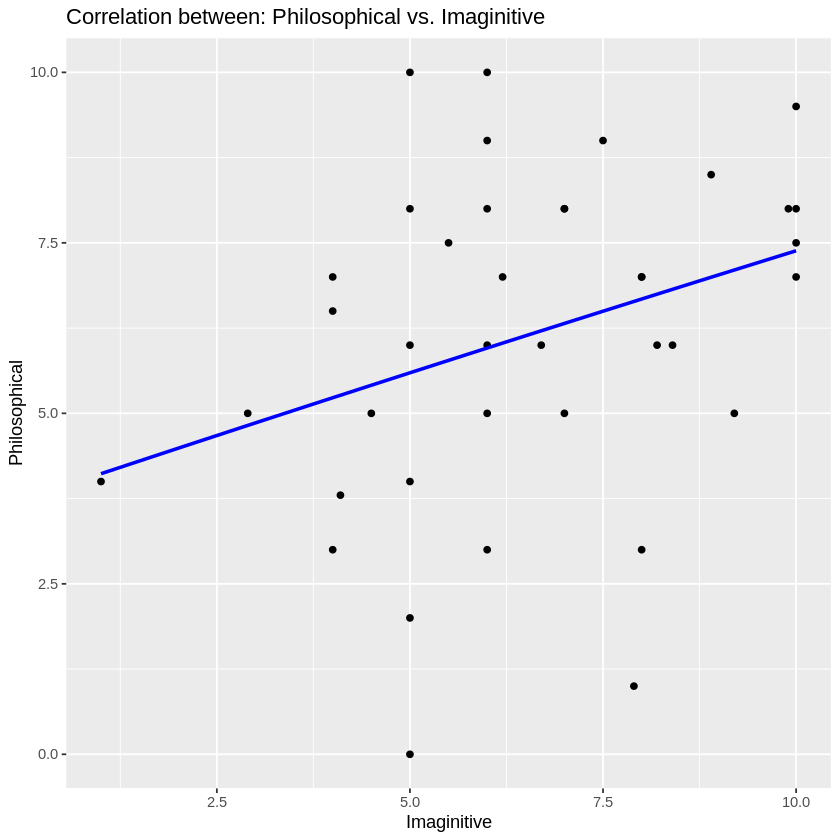

In [106]:
#1.Scatter Plot for the Imaginitive and Philosophical
Clean_Personality_df <- na.omit(Personality_Test_df)
#dim(Clean_Personality_df)
cor(Clean_Personality_df$Philosophical,Clean_Personality_df$Imaginitive)
ggplot(data = Clean_Personality_df, aes(x = Philosophical, y = Imaginitive)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue") +
  labs(x = "Imaginitive", y = "Philosophical") +
  ggtitle("Correlation between: Philosophical vs. Imaginitive")

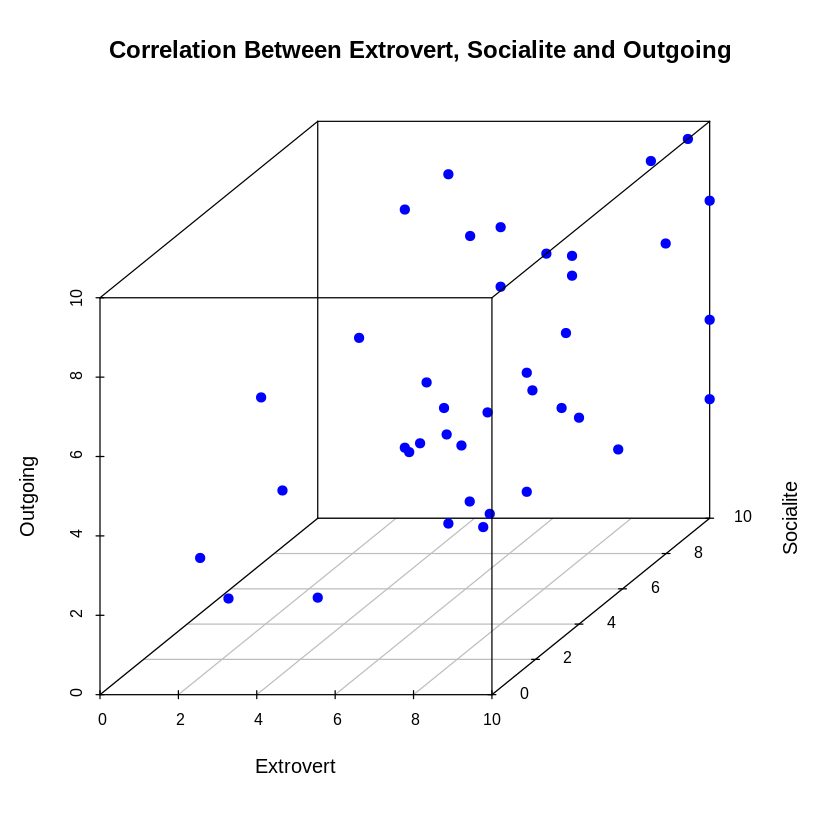

In [ ]:
#3D Scatter Plot for the Extrovert, Socialite and Outgoing
scatterplot3d(
  x = Clean_Personality_df$Extrovert,
  y = Clean_Personality_df$Socialite,
  z = Clean_Personality_df$Outgoing,
  color = "blue",
  pch = 19,  # Point shape
  main = "Correlation Between Extrovert, Socialite and Outgoing",
  xlab = "Extrovert",
  ylab = "Socialite",
  zlab = "Outgoing"
)

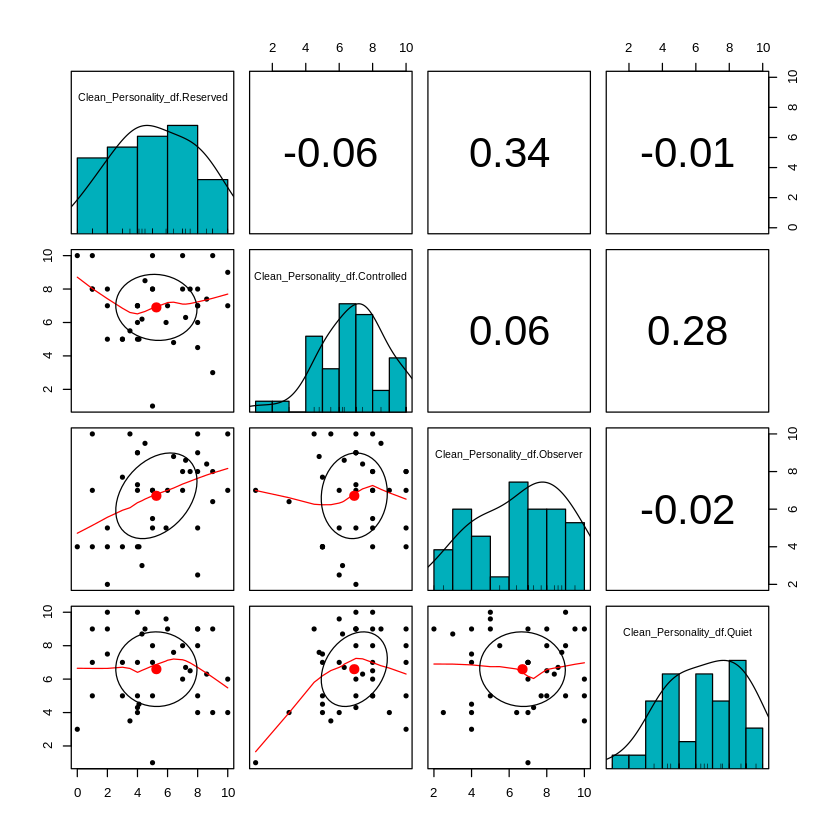

In [37]:
#Pair panel for pairing Reserved, Controlled, Observer, Quiet, Self_Reliant
Personality_panel_df <- data.frame(Clean_Personality_df$Reserved, Clean_Personality_df$Controlled, Clean_Personality_df$Observer, Clean_Personality_df$Quiet, Clean_Personality_df$Focused)
pairs.panels(Personality_panel_df[,-5],
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)


Call:
lm(formula = Imaginitive ~ Visionary, data = Personality_Test_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5230 -1.2433  0.5648  1.4770  3.9306 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1623     0.9301   5.550 4.78e-07 ***
Visionary     0.1512     0.1256   1.203    0.233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.418 on 70 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.02027,	Adjusted R-squared:  0.006274 
F-statistic: 1.448 on 1 and 70 DF,  p-value: 0.2329


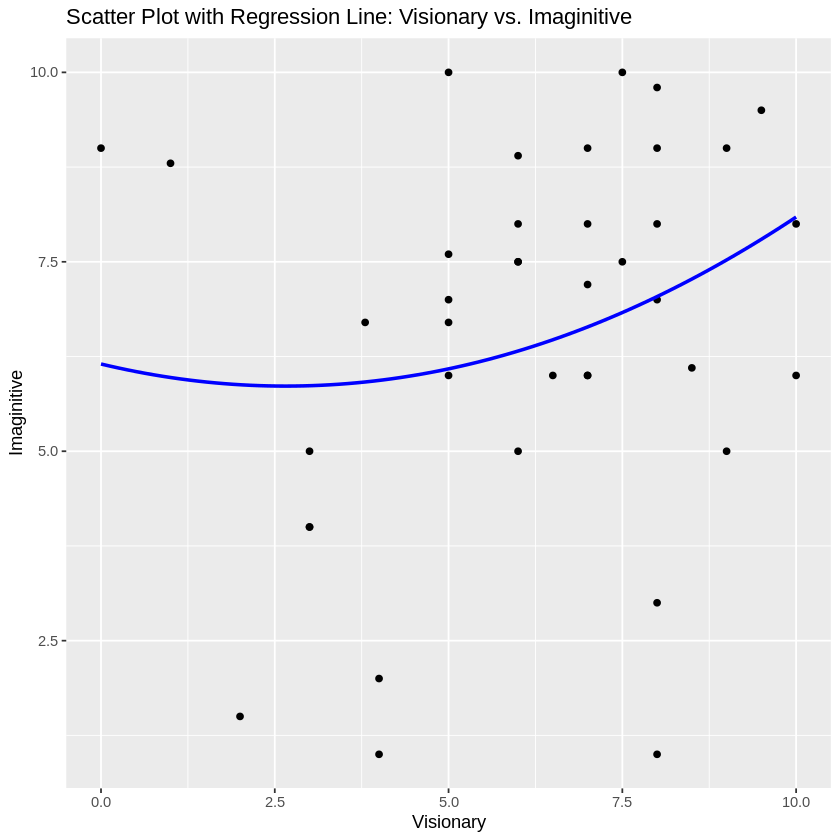

In [102]:
#!. Model for Openness
lm_Openness <- lm(Imaginitive ~ Visionary, data = Personality_Test_df)
summary(lm_Openness)
ggplot(data = Clean_Personality_df, aes(x = Imaginitive, y = Visionary)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue") +
  labs(x = "Visionary", y = "Imaginitive") +
  ggtitle("Scatter Plot with Regression Line: Visionary vs. Imaginitive")


Call:
lm(formula = Introvert ~ Observer, data = Personality_Test_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5590 -1.7872 -0.3147  1.4380  4.8708 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.9437     0.9402   3.131  0.00275 **
Observer      0.4371     0.1281   3.413  0.00119 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.18 on 57 degrees of freedom
  (43 observations deleted due to missingness)
Multiple R-squared:  0.1697,	Adjusted R-squared:  0.1551 
F-statistic: 11.65 on 1 and 57 DF,  p-value: 0.001187


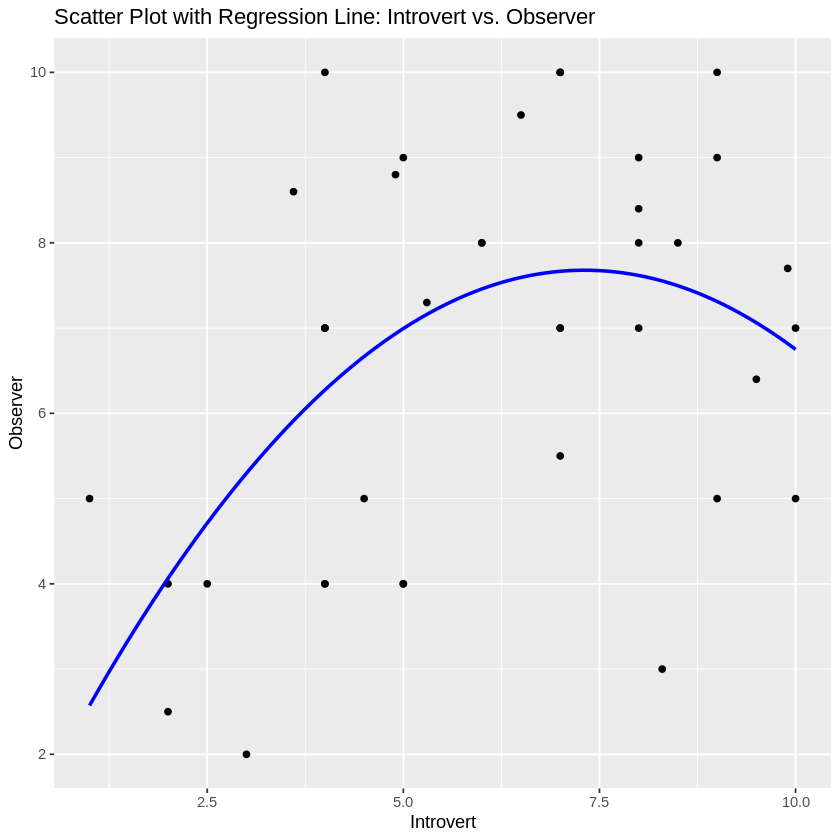

In [42]:
#2. Model for Introversion
lm_Introversion <- lm(Introvert ~ Observer, data = Personality_Test_df)
summary(lm_Introversion)
ggplot(data = Clean_Personality_df, aes(x = Introvert, y = Observer)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue") +
  labs(x = "Introvert", y = "Observer") +
  ggtitle("Scatter Plot with Regression Line: Introvert vs. Observer")


Call:
lm(formula = Logical ~ Practical, data = Personality_Test_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1986 -1.8724  0.3879  1.7590  3.5743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.81738    0.83866   6.936 2.03e-08 ***
Practical    0.08472    0.14356   0.590    0.558    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.231 on 41 degrees of freedom
  (59 observations deleted due to missingness)
Multiple R-squared:  0.008424,	Adjusted R-squared:  -0.01576 
F-statistic: 0.3483 on 1 and 41 DF,  p-value: 0.5583


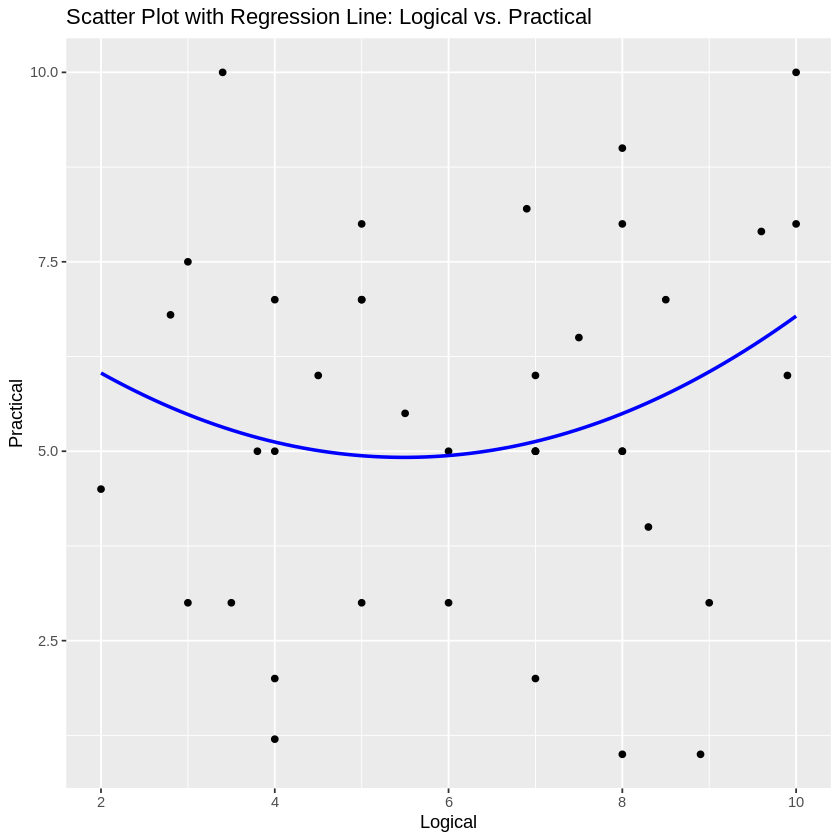

In [43]:
#3. Model for Conscientiousness
lm_Conscientiousness <- lm(Logical ~ Practical, data = Personality_Test_df)
summary(lm_Conscientiousness)
ggplot(data = Clean_Personality_df, aes(x = Logical, y = Practical)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue") +
  labs(x = "Logical", y = "Practical") +
  ggtitle("Scatter Plot with Regression Line: Logical vs. Practical")


Call:
lm(formula = Confident ~ Tactile, data = Personality_Test_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7073 -1.2971  0.4337  1.1730  4.0456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1860     0.7079   4.501 6.23e-05 ***
Tactile       0.4402     0.1160   3.793 0.000519 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.952 on 38 degrees of freedom
  (62 observations deleted due to missingness)
Multiple R-squared:  0.2746,	Adjusted R-squared:  0.2555 
F-statistic: 14.39 on 1 and 38 DF,  p-value: 0.0005191


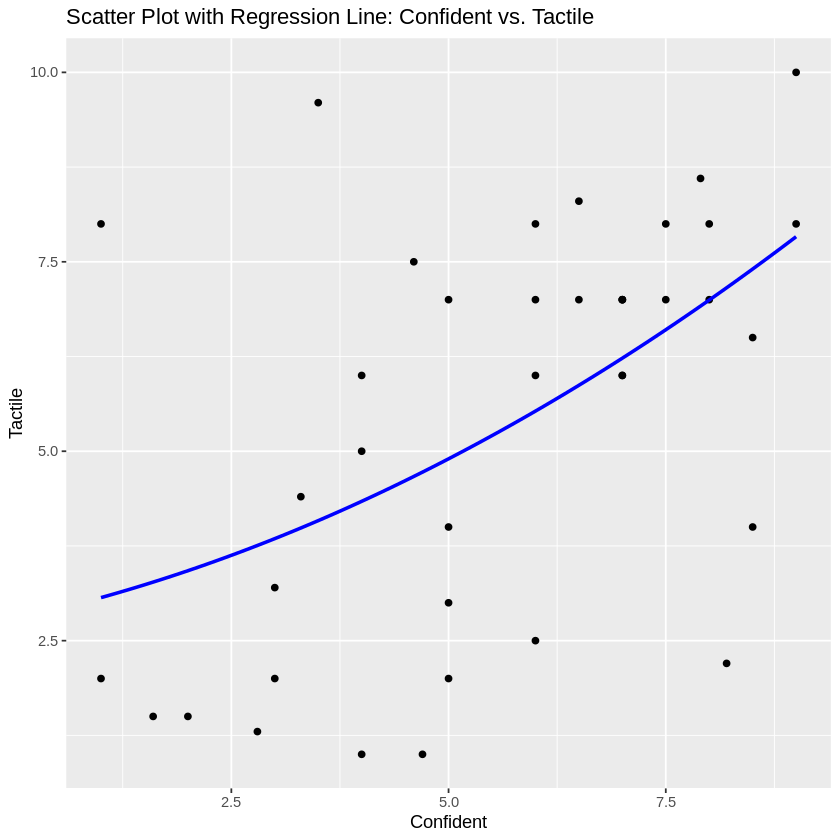

In [104]:
#4. Model for Extroversion
lm_Extroversion <- lm(Confident ~ Tactile, data = Personality_Test_df)
summary(lm_Extroversion)
ggplot(data = Clean_Personality_df, aes(x = Confident, y = Tactile)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue") +
  labs(x = "Confident", y = "Tactile") +
  ggtitle("Scatter Plot with Regression Line: Confident vs. Tactile")


Call:
lm(formula = Impulsive ~ Reactive, data = Personality_Test_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8886 -1.5004  0.4971  1.5334  3.0387 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.5489     0.6099   5.819 1.01e-06 ***
Reactive      0.4147     0.1085   3.821 0.000479 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.788 on 38 degrees of freedom
  (62 observations deleted due to missingness)
Multiple R-squared:  0.2776,	Adjusted R-squared:  0.2585 
F-statistic:  14.6 on 1 and 38 DF,  p-value: 0.0004786


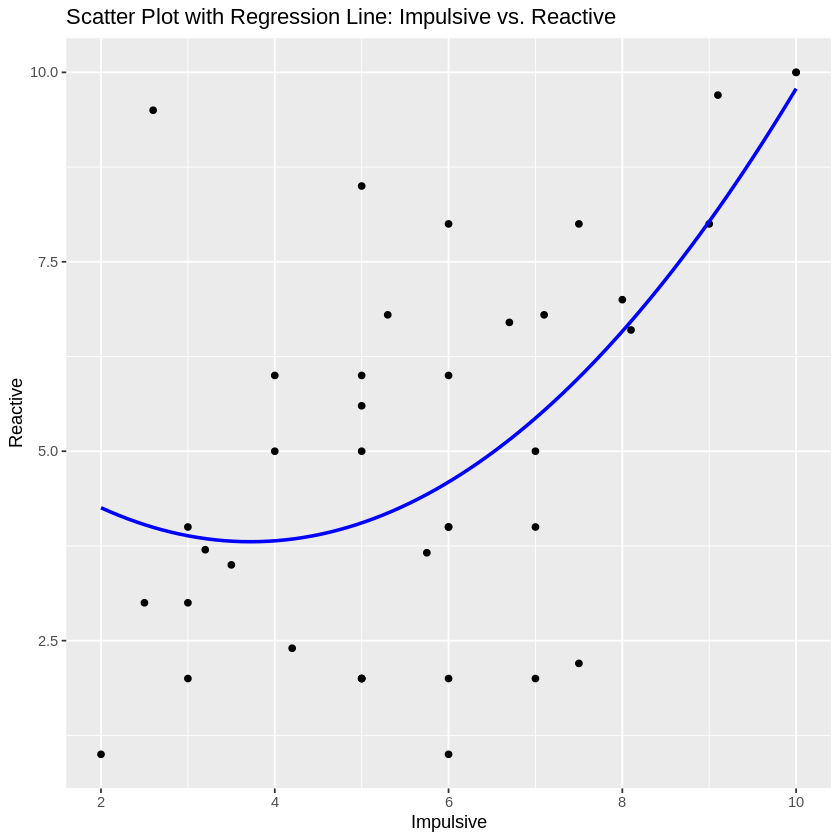

In [45]:
#5. Model for Neuroticism
lm_Neuroticism <- lm(Impulsive ~ Reactive, data = Personality_Test_df)
summary(lm_Neuroticism)
ggplot(data = Clean_Personality_df, aes(x = Impulsive, y = Reactive)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue") +
  labs(x = "Impulsive", y = "Reactive") +
  ggtitle("Scatter Plot with Regression Line: Impulsive vs. Reactive")

#**<u>4. Model Comparison :</u>**

1. <u>**Model 1 : Imaginative vs Visionary**</u>
  
**Coefficient Estimates:**
* Intercept (**5.1623**): This intercept represents the baseline level of imaginativeness when visionary attributes are absent.
* Visionary (**0.1512**): In this case, it's 0.1512, which suggests a positive relationship between "Visionary" and "Imaginative."
* **Significance:**
The p-value associated with the "Visionary" coefficient is **0.233**, which is greater than the common significance level of 0.05. This suggests that the "Visionary" variable is not statistically significant in predicting "Imaginative" in this dataset.

2. <u>**Model 2 : Introvert vs Observer**</u>
**Coefficient Estimates:**
* Intercept (**2.9437**): This intercept represents the baseline level of introversion when observer attributes are absent.
* Observer (**0.4371**): The coefficient for "Observer" represents the change in the "Introvert" variable for a one-unit change in the "Observer" predictor.  In this case, it's 0.4371, which suggests a positive relationship between "Observer" and "Introvert."
**Significance:**
The p-value associated with the "Observer" coefficient is very low (**0.00119)**, indicating that the "Observer" variable is highly statistically significant in predicting "Introvert." This suggests that the presence of "Observer" attributes is associated with higher levels of introversion.
* **R-squared and Adjusted R-squared:**
 The multiple R-squared value is **0.1697**, and the adjusted R-squared value is **0.1551**.
* These values indicate how well the model fits the data. In this case, the R-squared values are relatively low, suggesting that the "Observer" predictor explains a moderate portion of the variability in "Introvert."
Based on this analysis, it can be said that there is a statistically significant positive linear relationship between an individual's "Observer" attributes and their "Introvert" trait in the dataset. This suggests that individuals who exhibit more observer characteristics tend to have higher levels of introversion.

3. <u>**Model 3 : Logical vs Practical**</u>
**Coefficient Estimates:**
* Intercept (**5.81738**): This intercept represents the baseline level of logical thinking when practical attributes are absent.
* Practical (**0.08472**): The coefficient for "Practical" represents the change in the "Logical" variable for a one-unit change in the "Practical" predictor.
* In this case, it's **0.08472**, which suggests a positive relationship between "Practical" and "Logical."
**Significance:**
The p-value associated with the "Practical" coefficient is very high (**0.558**), This suggests that the presence of "Practical" attributes is not associated with a significant change in logical thinking.

4. <u>**Model 4 : Confidence vs Tactile**</u>
**Coefficient Estimates:**
* Intercept (**3.1860**): This intercept represents the baseline level of confidence when tactile attributes are absent.
* Tactile (**0.4402**): The coefficient for "Tactile" represents the change in the "Confident" variable for a one-unit change in the "Tactile" predictor. which suggests a positive relationship between "Tactile" and "Confident."
* **Significance:**
* The p-value associated with the "Tactile" coefficient is very low (0.000519), indicating that the "Tactile" variable is highly statistically significant in predicting "Confident."
* This suggests that the presence of "Tactile" attributes is strongly associated with higher levels of confidence.
* R-squared and Adjusted R-squared:
The multiple R-squared value is **0.2746**, and the adjusted R-squared value is 0.2555. These values indicate how well the model fits the data. In this case, the R-squared values are moderate, suggesting that the "Tactile" predictor explains a significant portion of the variability in "Confident." The model provides a reasonably good fit to the data.
Residual Standard Error (**1.952**):
* This value represents the average difference between the observed and predicted values of "Confident."
* It signifies the degree of error or uncertainty in the model's predictions. A lower residual standard error suggests more accurate

5. <u>**Model 5 : Impulsive vs Reactive**</u>
**Coefficient Estimates:**

* Intercept (**3.5489**): This  intercept represents the baseline level of impulsivity when reactive attributes are absent.
* Reactive (**0.4147**): The coefficient for "Reactive" represents the change in the "Impulsive" variable for a one-unit change in the "Reactive" predictor. which suggests a positive relationship between "Reactive" and "Impulsive."
**Significance:**
*The p-value associated with the "Reactive" coefficient is very low (**0.000479**), indicating that the "Reactive" variable is highly statistically significant in predicting "Impulsive." This suggests that the presence of "Reactive" attributes is strongly associated with higher levels of impulsivity.
* R-squared and Adjusted R-squared:
The multiple R-squared value is **0.2776**, and the adjusted R-squared value is 0.2585. These values indicate how well the model fits the data.  
* The model provides a reasonably good fit to the data.


###<u>Best Simple Linear Regression Model </u>
* The Last two models, **Confident vs Tactile** and **Impulsive vs Reactive**, appear to perform the best when these models are compared.
* They offer a respectably excellent fit to the data, have moderate R-squared values, and highly significant coefficients.

Accordingly, depending on the particular attribute select either **Confident Tactile** or **Impulsive Reactive** as the best predictor of the associated personality qualities.
* Though these models, despite being statistically significant, still have low R-squared values, indicating that additional, unmeasured factors might potentially be responsible for these qualities.



In [111]:
summary(lm_Openness)$r.squared
summary(lm_Openness)$adj.r.squared
AIC(lm_Openness)
BIC(lm_Openness)

[1] 0.02027019

[1] 0.006274047

[1] 335.4434

[1] 342.2734

In [112]:
summary(lm_Introversion)$r.squared
summary(lm_Introversion)$adj.r.squared
AIC(lm_Introversion)
BIC(lm_Introversion)

[1] 0.1697108

[1] 0.1551444

[1] 263.3357

[1] 269.5683

In [113]:
summary(lm_Conscientiousness)$r.squared
summary(lm_Conscientiousness)$adj.r.squared
AIC(lm_Conscientiousness)
BIC(lm_Conscientiousness)

[1] 0.008424037

[1] -0.01576074

[1] 195.0092

[1] 200.2928

In [114]:
summary(lm_Extroversion)$r.squared
summary(lm_Extroversion)$adj.r.squared
AIC(lm_Extroversion)
BIC(lm_Extroversion)

[1] 0.2746311

[1] 0.2555424

[1] 170.9835

[1] 176.0501

In [115]:
summary(lm_Neuroticism)$r.squared
summary(lm_Neuroticism)$adj.r.squared
AIC(lm_Neuroticism)
BIC(lm_Neuroticism)

[1] 0.2775557

[1] 0.258544

[1] 163.9603

[1] 169.0269

# **5. <u>Multiple Linear Regression :</u>**

* This Regression model is to predict "Introvert" and "Extrovert" personalities which is the dependent variable using multiple predictor variables: "Outgoing", "Socialite", "Bold", "Expressive","Shy","Quiet", "Observer" and "Calm".
* It means we're modeling "Extrovert" and. "Introvert" as the dependent variable and trying to figure out how respective dependent variables influence or explain differences in the response variables.

**Model 1: ExtrovertModel**
1. Plot 1-
*   A scatterplot of the association between "Extrovert" range on the x-axis and "Shy" on the y-axis is shown in this plot.
*   The blue line represents the data-fitted linear regression line, illustrating the Negative linear relationship between Extrovert and Shy.

2. Plot 2-
*   A scatterplot of the association between "Extrovert" range on the x-axis and "Outgoing" on the y-axis is shown in this plot.
*   The blue line represents the data-fitted linear regression line, illustrating the Positive linear relationship between Extrovert and Outgoing.

**Model 1: IntrovertModel**
1. Plot 1-
*   A scatterplot of the association between "Introvert" range on the x-axis and "Observer" on the y-axis is shown in this plot.
*   The blue line represents the data-fitted linear regression line, illustrating the Positive linear relationship between Introvert and Observer.

2. Plot 2-
*   A scatterplot of the association between "Introvert" range on the x-axis and "Shy" on the y-axis is shown in this plot.
*   The blue line represents the data-fitted linear regression line, illustrating the Positive linear relationship between Introvert and Shy.

### <u>**Comparison between Multi Linear Regression Model** </u>

**Model 1 : Extrovertmodel**
* Coefficient Estimates:
Intercept (**3.44653**): This intercept represents the baseline level of extroversion when all personality traits are absent.
* R-squared and Adjusted R-squared:
The multiple R-squared value is **0.272**, and the adjusted R-squared value is **0.1973**.
The model provides a moderate fit to the data.
* Residual Standard Error (**2.048**):
A lower residual standard error suggests more accurate predictions.
* p-value:
The low p-value (**0.01291**) indicates that the overall model is statistically significant.

**Model 2 : Introvertmodel**
* Coefficient Estimates:
Intercept (**2.41025**): This intercept represents the baseline level of introversion when all personality traits are absent.
* R-squared and Adjusted R-squared:
The multiple R-squared value is ** 0.2707**, and the adjusted R-squared value is **0.2167**.
The model provides a moderate fit to the data.
* Residual Standard Error (**2.099**):
A lower residual standard error suggests more accurate predictions.
* p-value:
The low p-value (**0.001651**) indicates that the overall model is statistically significant.

### <u>**Best Multi Linear Regression Model** </u>

* Based on the analysis, we can see that "Extrovert Model" has one statistically significant predictor which is "Socialite" where on the other hand "Introvert Model" has two statistically significant predictor "Shy" and "Observer".
* Also, there is a minimal difference in R squared values.
* The residual standard errors. A lower value indicates less error in the predictions. In this case, both models have similar residual standard errors, so this factor doesn't strongly differentiate them.
* Given the factors mentioned above, both models have their strengths and weaknesses, and the choice between them may depend on the specific business context and objectives.
* If we need to predict extroversion, the model with "Socialite" as the predictor may be more straightforward and requires only one predictor variable. On the other hand, if you want to predict introversion, the model with "Shy" and "Observer" as predictors provides slightly better explanatory power.
* For now, to choose between the two models I chose the Introversion Model as the best as it has two statistically significant predictor.



In [30]:
#Multi-linear Regression Model for Extrovertmodel
Extrovertmodel <- lm(Extrovert ~ Socialite + Outgoing + Expressive + Bold, data = Personality_Test_df)
summary(Extrovertmodel)


Call:
lm(formula = Extrovert ~ Socialite + Outgoing + Expressive + 
    Bold, data = Personality_Test_df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.772 -0.522  0.512  1.238  3.099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.44653    1.05685   3.261  0.00231 **
Socialite    0.40085    0.14043   2.854  0.00687 **
Outgoing     0.11972    0.11830   1.012  0.31778   
Expressive  -0.04372    0.12665  -0.345  0.73178   
Bold         0.06976    0.11347   0.615  0.54229   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.048 on 39 degrees of freedom
  (58 observations deleted due to missingness)
Multiple R-squared:  0.272,	Adjusted R-squared:  0.1973 
F-statistic: 3.643 on 4 and 39 DF,  p-value: 0.01291


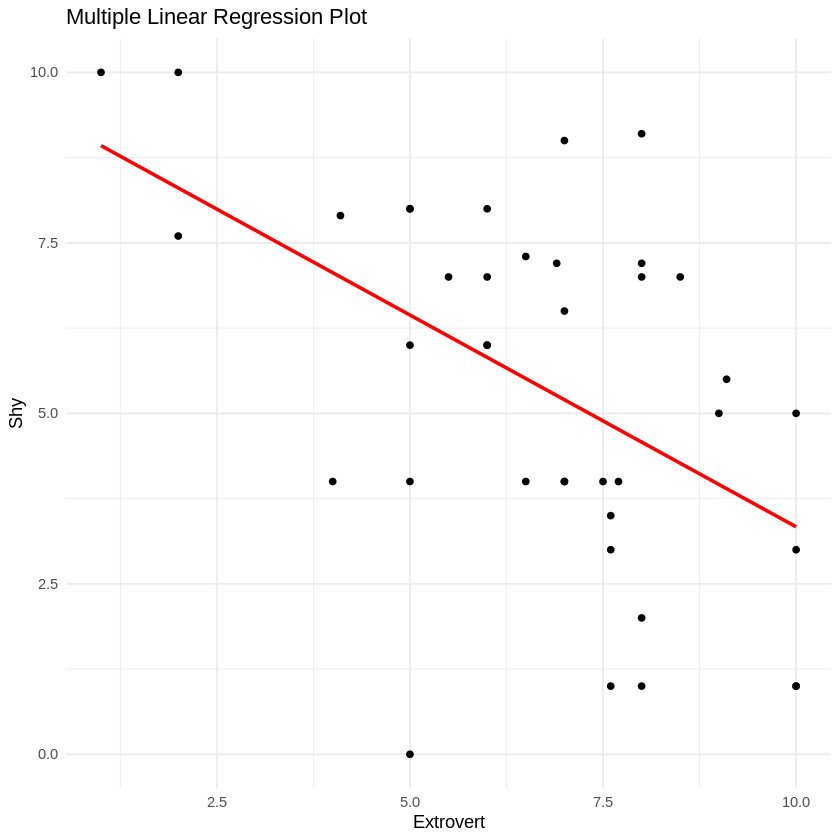

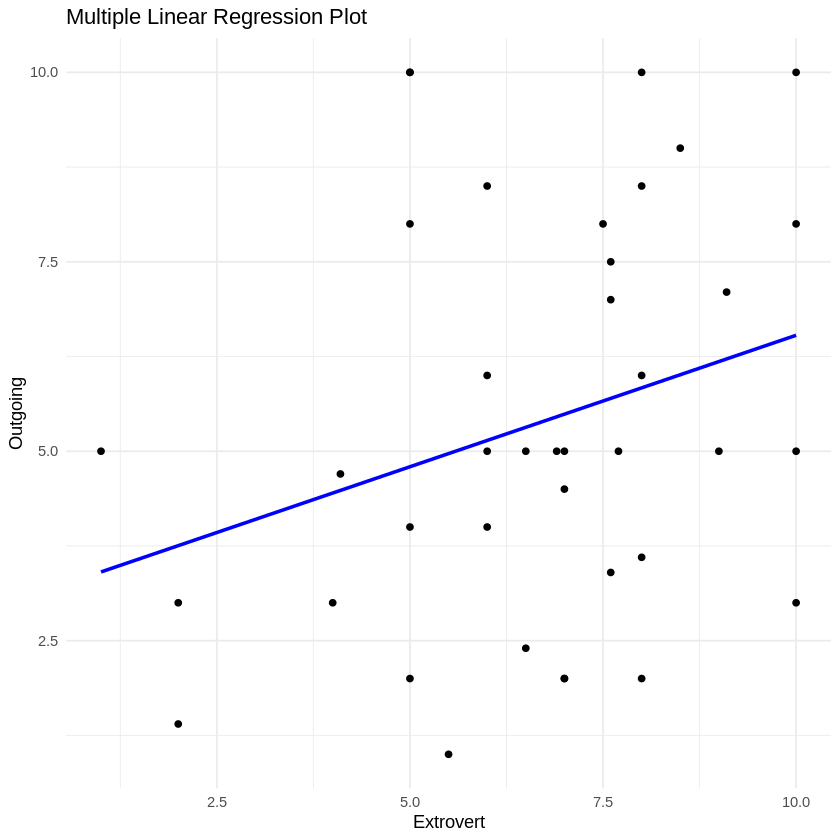

In [118]:
#1.Extrovert - Shy negative Linear Regression
ggplot(Clean_Personality_df, aes(x = Extrovert, y = Shy)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "red") +
  labs(title = "Multiple Linear Regression Plot",x = "Extrovert",y = "Shy") + theme_minimal()
#Extrovert - Outgoing positive linear Regression
ggplot(Clean_Personality_df, aes(x = Extrovert, y = Outgoing)) +
  geom_point() + geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
  labs(title = "Multiple Linear Regression Plot", x = "Extrovert", y = "Outgoing") +theme_minimal()

In [32]:
#2. Multi-linear Regression Model for Introvertmodel
Introvertmodel <- lm(Introvert ~ Shy + Quiet + Observer + Calm, data = Personality_Test_df)
summary(Introvertmodel)


Call:
lm(formula = Introvert ~ Shy + Quiet + Observer + Calm, data = Personality_Test_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1619 -1.3761 -0.0144  1.2001  4.6759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.41025    1.79701   1.341  0.18545   
Shy          0.24170    0.10671   2.265  0.02755 * 
Quiet       -0.10239    0.12762  -0.802  0.42589   
Observer     0.41032    0.12691   3.233  0.00209 **
Calm         0.03314    0.11811   0.281  0.78011   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.099 on 54 degrees of freedom
  (43 observations deleted due to missingness)
Multiple R-squared:  0.2707,	Adjusted R-squared:  0.2167 
F-statistic: 5.012 on 4 and 54 DF,  p-value: 0.001651


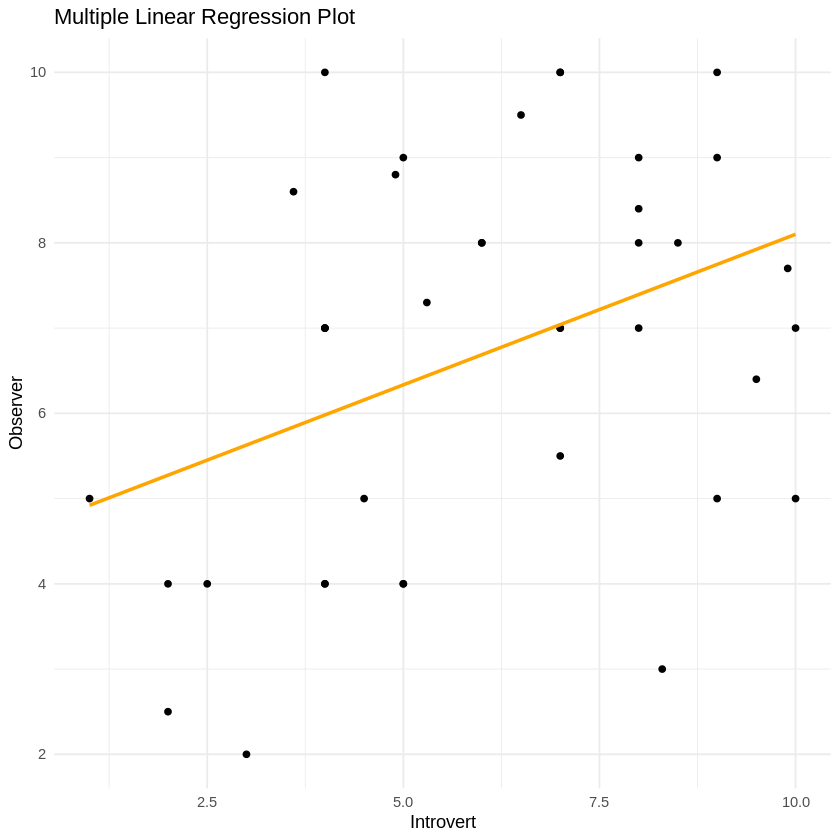

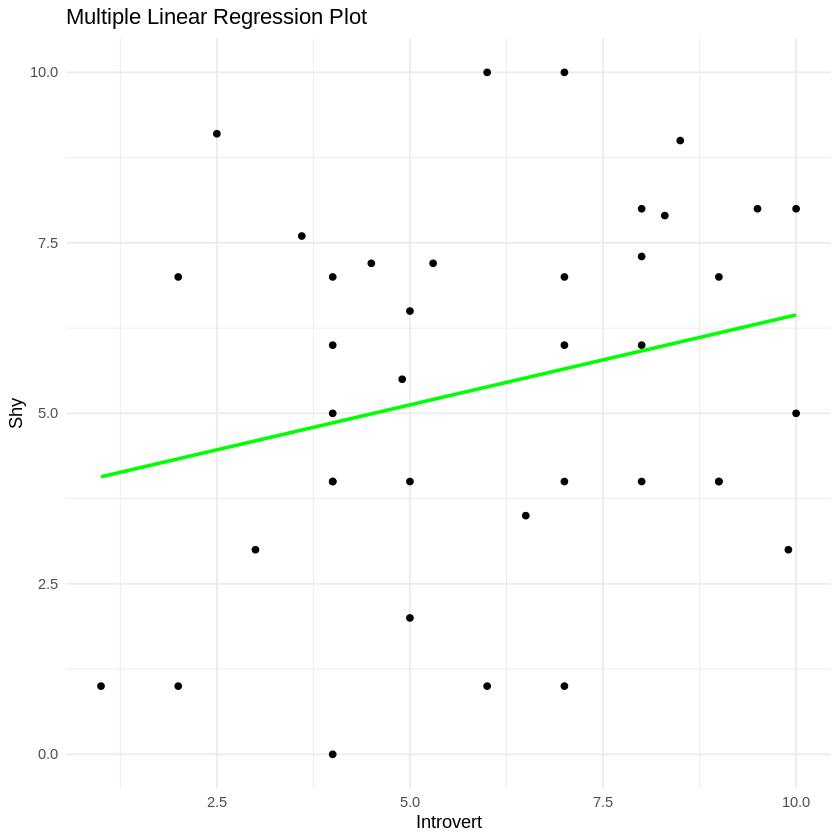

In [120]:
#2.
ggplot(Clean_Personality_df, aes(x = Introvert, y = Observer)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "orange") +
  labs(title = "Multiple Linear Regression Plot",x = "Introvert",y = "Observer") + theme_minimal()
#second plot
ggplot(Clean_Personality_df, aes(x = Introvert, y = Shy)) +
  geom_point() + geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "Green") +
  labs(title = "Multiple Linear Regression Plot", x = "Introvert", y = "Shy") +theme_minimal()


###<u>**Comparison Results of Simple and Multiple Linear Regression**</u>
* Based on the plots and the statistical values for specifically R squared measures, generally a higher R-squared generally indicates a better fit.
* Here, the Linear Regression Model 4 and 5 tends to have the highest R-Squared values which is (**0.277**)
* In addition, Lower p-values indicate more significant predictors, which is 0.00 in both Simple and Multi Linear models.
* Also, A lower RSE indicates better model fit, which is again lower in one of teh Simple Linear Regression Model, Model 5 (**Impulsive vs Reaction**) as (**1.788**) as compare to the Multiple Linear Regression Model which is (**2.099**).
* Hence, based on the statistical values, I strongly agree that the **Best Model** amongst both Simple and Multiple Linear Regression is **Model 5(Impulsive vs Reaction)** of Simple Linear Regression which is excellent fit to the data, have moderate R-squared values, and highly significant coefficients.

#**<u>6. Summary:</u>**


1.   Research started with importing three different file, these files then     
     merged into one single sheet post which performed  EDA on the dataset which is to analyze and investigating data
     sets and summarize the data.
2.   Checked for the missing data using anyNA(), removed missing values using
     drop_na() and complete.cases() performed cleansing.
3.   Calculated the median of few entities to fill the missing values with
     best possible data.
4.   Found the correlation between few variables using cor() just to have a
     glimse of the relationship between the variables.
5.   Created 5 different Simple Linear Regression Models using lm() for the
     dependent Variables as Impulsive, Confident, Logical, Introvert and Imaginitive with the independent variables as Visionary, Observer, Practical, Tactile and Reactive.
6.   Compared all the 5 models based on their coefficient values, Significance,
     R-squared values, p-values and Residual Error. These values were populated by getting the summary() of the model.
7.   Identified the best Simple Linear Model based on the statistical figures   
     of R-squared and p-values.
8.   Created Multiple Linear Regression for the two Personalities i.e.
     Introvert and Extrovert where predicted the Introverted and Extroverted Personalities based on the independent variables as Bold, Socialite, Outgoing, Shy, Quiet, Observer.
9.   Identified the best Multiple Linear Regression Model and compared the
     results of the  Simple and Multiple Linear Regresion through which came to a conclusion that Model 5 (Impulsive vs Reaction) tends to be the best model that fits with the data.



#<u>**7. Recommendations:**</u>

In my linear regression analysis, I examined the relationship between different personality traits. The model aimed to predict two personality traits: Introvert and Extrovert. However, I came to a conclusion that this data is not enough and the variable which I have used to create teh models are not enough to identfy these traits.

Although, based on the analysis and comparisons between the models,I came to a conclusion that the **Best Model** amongst both Simple and Multiple Linear Regression is **Model 5(Impulsive vs Reaction)** of Simple Linear Regression which is excellent fit to the data, have moderate R-squared values, and highly significant coefficients.

**Best Model Statistics:**
* R-squared: 0.277555651013744
* Adjusted R-squared: 0.258543957619368
* AIC: 163.960254947883
* BIC: 169.026893310224

Thus, my research clearly states that, Reaction is the significant predictor to identify the Impulsive behaviour.

Additionally, based on my research, I strongly advise schools, universities, and psychology departments to regularly undertake surveys like this. They allow us to run more analyses through models, which may ultimately aid the department to offer better services.


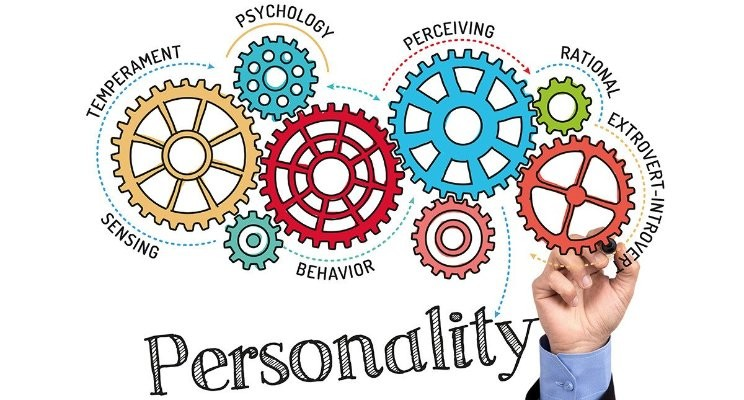

**References :-**

* zyBooks
* Chatgpt
